# Read the data
https://lobsterdata.com/info/DataSamples.php

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

orderbook = "data/GOOG_2012-06-21_34200000_57600000_orderbook_10.csv"
message = "data/GOOG_2012-06-21_34200000_57600000_message_10.csv"

df_message = pd.read_csv(message,usecols = [0,1,3,4,5], names=['time', 'type','size','price','direction'])
df_message.head()
df_message.index = pd.Timestamp(datetime.date.today()) + pd.TimedeltaIndex(df_message.time, unit='s')

In [1]:
df_message.to_csv("tick.csv")

In [ ]:
############################
############################
############################
## tick level statistics
############################
############################
############################

In [2]:
# On order type: order to trade ratio: 10 to 1
df_message.groupby("type").count()[["time"]]

time
type       
1     71258
2        19
3     64961
4      7765
5      3913

In [3]:
# orders by mins
df_message.groupby("type").count()[['time']]/6.5/60

time
type            
1     182.712821
2       0.048718
3     166.566667
4      19.910256
5      10.033333

# limit order dynamics


In [4]:
### limit order dynamics
df_lo = df_message[df_message['type'] == 1]
df_lo.groupby('direction').agg({"time":"count","size":"sum"}).rename(columns={"time":"count"})

count     size
direction                
-1         37136  2174762
 1         34122  2345778

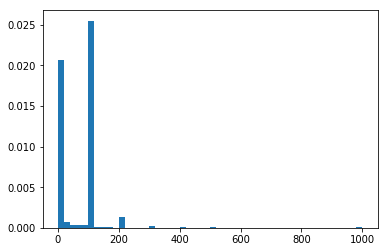

size
count  34122.000000
mean      68.746791
std       74.427158
min        1.000000
25%       10.000000
50%      100.000000
75%      100.000000
max     2000.000000

In [5]:
df_lo_bid = df_lo[df_lo['direction'] ==1]
plt.hist(df_lo_bid['size'], 50, normed=True, range=[0, 1000])
plt.show()

# limit bid (buy) order 
df_lo_bid.describe()[["size"]]

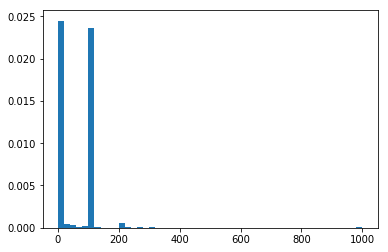

size
count  37136.000000
mean      58.562096
std       69.253200
min        1.000000
25%       10.000000
50%       41.000000
75%      100.000000
max     2300.000000

In [6]:
df_lo_ask = df_lo[df_lo['direction'] == -1]
plt.hist(df_lo_ask['size'], 50, normed=True, range=[0, 1000])
plt.show()

# limit ask order 
df_lo_ask.describe()[["size"]]

# Trades

In [7]:
# Trades
df_trade = df_message[(df_message['type'] == 4) | (df_message['type'] == 5)] 
df_trade.to_csv('trade.csv')

In [2]:
# trading direction
df_trade.head()

NameError: name 'df_trade' is not defined

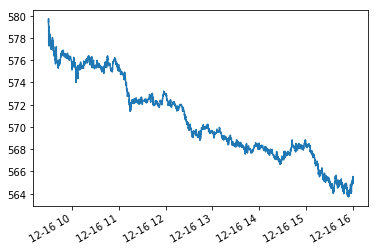

In [9]:
(df_trade['price']/10000).plot()
plt.show()

In [10]:
df_trade['return'] = (df_trade['price'].shift(-1)) - (df_trade['price'])

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


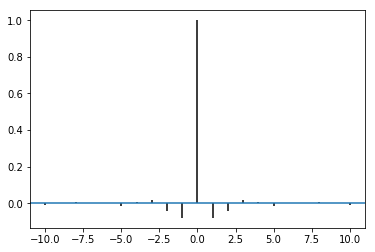

In [11]:
df_trade['return'].autocorr()
df_trade.dropna(inplace=True)
plt.acorr(df_trade['return'])
plt.show()

In [12]:
df_trade.groupby("direction").agg({"time":"count","size":"sum"})

time    size
direction              
-1         5808  354732
 1         5869  351293

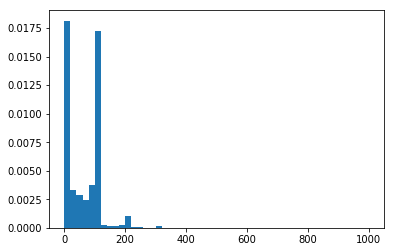

In [13]:
df_trade_bid = df_trade[df_trade['direction'] == -1]
plt.hist(df_trade_bid['size'], 50, normed=True, range=[0, 1000])
plt.show()

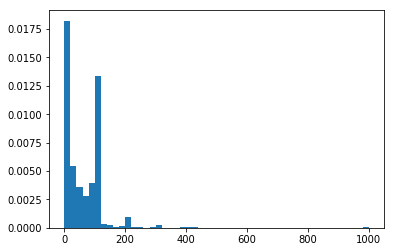

In [14]:
df_trade_ask = df_trade[df_trade['direction'] == 1]
plt.hist(df_trade_ask['size'], 50, normed=True, range=[0, 1000])
plt.show()

# re-sampling

In [15]:
message1m = df_message.resample('1min').last()
message1m.to_csv('1min.csv')
# message1s.shape
message1m['logreturn'] = np.log(message1m['price'].shift(-1)) - np.log(message1m['price'])
message1m['return'] = (message1m['price'].shift(-1)) - (message1m['price'])
message1m.dropna(inplace=True)

In [16]:
message1m.tail()

time  type  size    price  direction  logreturn  \
2019-12-16 15:54:00  57299.760336     1     4  5639100          1   0.000089   
2019-12-16 15:55:00  57359.397065     3   100  5639600          1   0.000886   
2019-12-16 15:56:00  57419.787423     1     7  5644600         -1  -0.000656   
2019-12-16 15:57:00  57479.232971     1   100  5640900          1   0.001665   
2019-12-16 15:58:00  57539.724502     1   100  5650300         -1   0.000831   

                     return  
2019-12-16 15:54:00   500.0  
2019-12-16 15:55:00  5000.0  
2019-12-16 15:56:00 -3700.0  
2019-12-16 15:57:00  9400.0  
2019-12-16 15:58:00  4700.0

In [17]:
def trade_sample(df_message = df_message, freq='1MIN'):
    trade_sampled = df_message.resample(freq).last()
    trade_sampled['logreturn'] = np.log(trade_sampled['price'].shift(-1)) - np.log(trade_sampled['price'])
    trade_sampled['return'] = (trade_sampled['price'].shift(-1)) - (trade_sampled['price'])
    trade_sampled.dropna(inplace=True)
    return trade_sampled 

In [129]:
trade_sample(freq='4MIN')['return'].std()

16045.79866005975

In [131]:
trade_sample(freq='81MIN')['return'].std()

61183.87587156167

In [130]:
trade_sample(freq='1MIN')['return'].std()

12547.92347958779

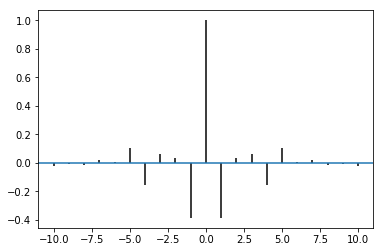

In [132]:
plt.acorr(trade_sample(freq='1MIN')['return'])
plt.show()

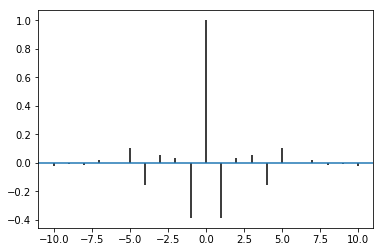

In [115]:
plt.acorr(trade_sampled['logreturn'])
plt.show()